# Algoritmos e Programação Estruturada

APE-U3S1

## Procedimentos e funções

In [6]:
#include<stdio.h>

int main() {
    printf("Hello World!");
    return 0;
}

Hello World!

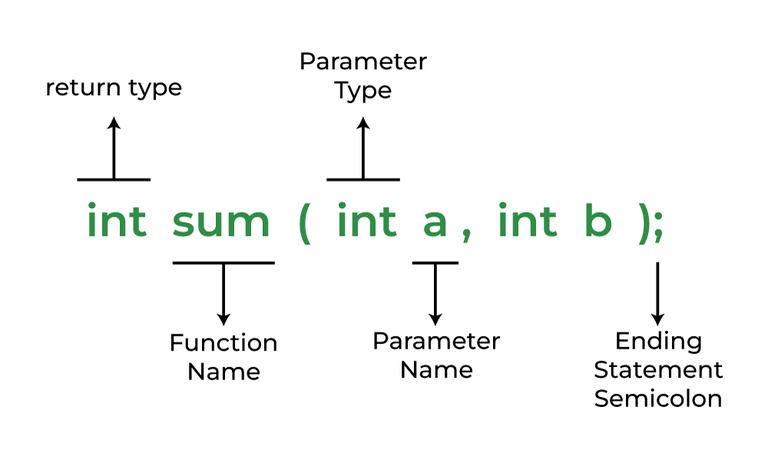

https://www.geeksforgeeks.org/c-functions/

A ideia de "funções" vem da técnica "dividir para conquistar" onde um problema é subdividido em problemas menores mais simples e fáceis de implementar. Algumas vantagens:

- Modularização, organização, divisão
- Reduz a complexidade
- Permite o reuso
- Uma pessoa trabalha em uma função (ou módulo) enquanto outra trabalha em outro
- As funções são "unidas" em uma etapa posterior
- A função pode ser testada fora ou dentro do programa principal
- Uma função pode ser substituída por outra melhorada, sem alterar o programa principal

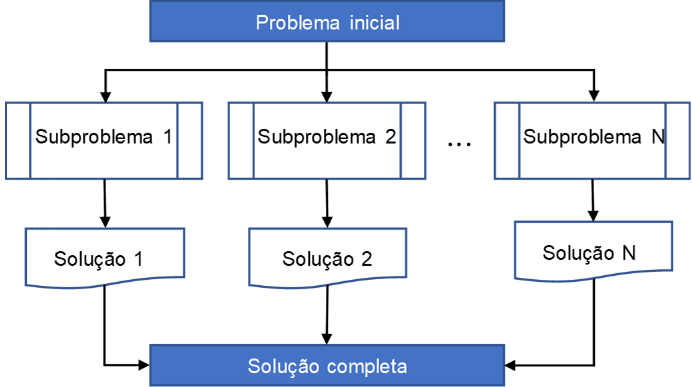

    <tipo de retorno> <nome> (<parâmetros>) {
      <comandos da função>
      <retorno>
    }

- **tipo de retorno**
    - int, car, float, double, ou void
    - quando é *void* pode ser chamado de *procedimento*
- **nome**
    - não pode ter acento ou caractere especial
    - mesmas regras para nomes de variáreis
- **parênteses** e **colchetes**
    - obrigatórios
- **retorno**
    - valor que a função retorna para quem a chamou
    - se for *void* não é necessário

A função **main()** faz parte da linguagem e determina onde o programa inicia.

Vamos adotar que será sempre a última função de um programa.

In [5]:
#include<stdio.h>

int somar() {
    return 2 + 3;
}

int main() {
    int resultado = 0;
    resultado = somar();
    printf("O resultado da função é %d.", resultado);
    return 0;
}

O resultado da função é 5.

Vamos alterar apenas função somar()

In [9]:
#include<stdio.h>

int somar(int a, int b) {
    int c;

    c = a + b;
    return c;
}

int main() {
    int resultado = 0;

    resultado = somar(2, 3);
    printf("O resultado da função é %d.", resultado);
    return 0;
}

O resultado da função é 5.

O **return** da **main** retorna o valor para o sistema operacional. Na linha de comando do sistema operacional é possível utilizar esse valor. O valor zero é considerado execução sem erro.

O ideal é sempre pensar na economia de recursos, quantidade menor de variáveis, poucas linhas mantendo a legibilidade, economia de memória, usar variáveis inteiras quando possível, nomes completos para variáveis e funções funcionando como documentação, e principalmente pensar sempre em documentação e manutenção por outras pessoas.

### Função para calcular o quadrado de um número

In [10]:
#include<stdio.h>

float calcular() {
    float num;

    printf("Digite um numero: ");
    scanf("%f", & num);
    return num * num;
}

int main() {
    float resultado = 0;

    resultado = calcular();
    printf("A potencia do numero digitado = %.2f ", resultado);
    return 0;
}

Digite um numero: 

 10


A potencia do numero digitado = 100.00 

O uso de funções permite que a execução não seja "sequencial", ou seja, a execução desvia para a função e depois retorna para o programa que a chamou.

## Funções e ponteiros

- Um ponteiro é um endereço de memória
    - A sintaxe usa o símbolo asterisco ("*") para indicar que é um ponteiro
        - Cuidado: o asterisco também é usado como símbolo da multiplicação, de comentário, etc.
        - O asterisco é usado tanto para declarar o ponteiro como para acessar o conteúdo da memória apontada por ele.
    - O símbolo "e comercial" ("&") é usado significando "endereço de"
- Variáveis que armazenam ponteiros, armazenam endereços de memória
- C permite usar também um ponteiro para uma função
    - É o endereço de memória onde a função está

Em C uma função retorna uma variável vetor como um ponteiro.

Para `int` e `float` o valor retornado é o próprio valor, mas para vetores é um ponteiro que é retornado, é o endereço de memória do vetor.

In [33]:
#include<stdio.h>

char * msg(char * str) {
    return str;
}

int main() {
    char vetor[] = "Oi, mundo!";

    printf(msg(vetor));
    return 0;
}

Oi, mundo!

In [39]:
#include<stdio.h>

char * msg() {
    static char vetor[] = "Oi, mundo!";

    return vetor;
}

int main() {
    printf(msg());
    return 0;
}

Oi, mundo!

Os asteriscos estão indicando que o retorno e o parâmetro são ponteiros.

Variáveis estáticas (*static*):

- Permanecem o tempo todo na memória enquanto o programa está rodando
- Não são destruídas quando a função termina
- Permite acessar a variável (usando ponteiro) que de outra forma seria local à função (criada apenas quando a função é executada, e destruída quando a função termina)

## Exemplo - gerador de duas sequências randômicas

In [37]:
#include<stdio.h>

//função que retorna um ponteiro do tipo inteiro
int * gerarRandomico() {
    static int r[5];
    int a;

    for (a = 0; a < 5; ++a) {
        r[a] = rand();
        printf("r[%d] = %d\n", a, r[a]);
    }
    return r;
}

int main() {
    //ponteiro do tipo inteiro
    int * p; 
    int i;

    //a função retorna um ponteiro
    p = gerarRandomico();

    for (i = 0; i < 5; i++) {
        // "*(p + i)" acessa os elementos do vetor
        printf("\n p[%d] = %d", i, *(p + i));
    }
    return 0;
}

r[0] = 1804289383
r[1] = 846930886
r[2] = 1681692777
r[3] = 1714636915
r[4] = 1957747793

 p[0] = 1804289383
 p[1] = 846930886
 p[2] = 1681692777
 p[3] = 1714636915
 p[4] = 1957747793

## Alocação dinâmica de memória: *malloc()*

- malloc() retorna um ponteiro do tipo *void* que pode ser convertido ("cast") em um ponteiro de qualquer formato
- Não inicializa a memória em tempo de execução
- retorna NULL se não foi possível alocar memória

In [53]:
#include<stdio.h>

int main() {
    int i, n = 5, * ptr = (int * ) malloc(n * sizeof(int));

    //verifica se conseguiu alocar
    if (ptr == NULL) {
        printf("Memória não alocada.\n");
        exit(1); //retorna ao S.O. indicando erro
    }

    //preenche o array
    for (i = 0; i < n; ++i) ptr[i] = i + 1;

    //imprime
    for (i = 0; i < n; ++i) printf("%d, ", ptr[i]);

    return 0;
}

1, 2, 3, 4, 5, 